In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("movieData.csv")

In [3]:
X = np.hstack((np.ones((13,1)),np.array(df.iloc[:,0:2])))
y = np.array(df['Watched']).reshape(-1,1)
y = [1 if x > 0 else 0 for x in y]

In [4]:
w = np.random.uniform(-1,1,3).reshape(-1,1)

In [5]:
import random

In [6]:
random.sample(range(len(X)),1)

[0]

In [7]:
check = False
i = 0
lr = 0.01
while not check:
    i+=1
    h = np.matmul(X,w)
    pred = [1 if x > 0 else 0 for x in h]
    check = pred == y
    if not check:
        idx = random.sample(range(len(X)),1)[0]
        update = (y[idx] - pred[idx])*X[idx]
        wnew = w + 0.01*update.reshape(-1,1)
        w = wnew
        

In [8]:
import seaborn
import matplotlib.pyplot as plt

In [9]:
def abline(slope,intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

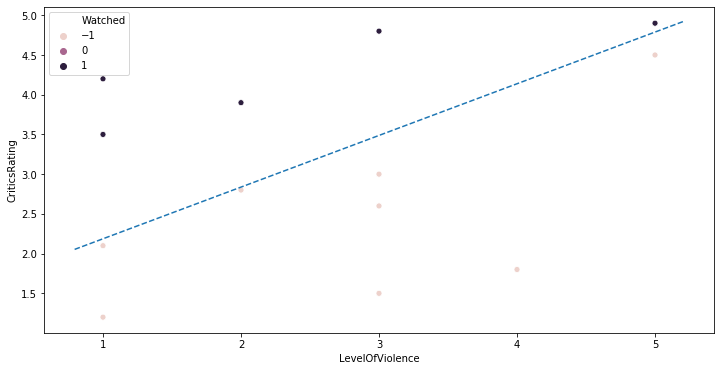

In [10]:
plt.figure(figsize=(12,6))
seaborn.scatterplot(x='LevelOfViolence',y='CriticsRating', data=df, hue='Watched')
abline(-w[1]/w[2],-w[0]/w[2])